In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
def handle_matcher_names(df, encoding_mode=None):
    substitutions = {
        "header_values_default": "Default",
        "header_values_verbose": "Verbose",
        "header_values_repeat": "Repeat",
        # 'header_values_prefix': 'Prefix',
        "header_only": "Header only",
        "header_values_verbose_notype": "Verbose",
        # 'header_values_columnvaluepair_notype': 'Header-Value repeat',
        # 'header_header_values_repeat_notype': 'Repeat',
        # 'header_values_default_notype': 'Default',
    }

    if "encoding_mode" not in df.columns:
        df["encoding_mode"] = encoding_mode

    df["encoding_mode"] = df["encoding_mode"].replace(substitutions)

    to_show = [
        #'Default (Type)',
        "Default",
        "Verbose",
        "Repeat",
        # 'Header-Value repeat',
        "Header only",
    ]

    if encoding_mode is None:
        df = df[df["encoding_mode"].isin(to_show)].copy()

    if "sampling_size" in df.columns:
        sampling_size = 10
        df = df[df["sampling_size"] == sampling_size].copy()

    if "sampling_mode" in df.columns:
        df["sampling_mode"] = df["sampling_mode"].str.title()
        df["sampling_mode"] = df["sampling_mode"].str.replace("_Sampling", "")
        df = df[df["sampling_mode"] != "Mixed"].copy()
    else:
        df["sampling_mode"] = "Priority"

    df.rename(columns={"All_RecallAtSizeofGroundTruth": "Recall@GT"}, inplace=True)
    df.rename(columns={"mrr": "MRR"}, inplace=True)

    # only keep columns [benchmark,dataset,source_table,target_table,method,encoding_mode, sampling_mode, Recall@GT, MRR]
    df = df[
        [
            "benchmark",
            "dataset",
            "source_table",
            "target_table",
            "method",
            "encoding_mode",
            "sampling_mode",
            "Recall@GT",
            "MRR",
        ]
    ].copy()

    return df

In [ ]:
all_zs_dfs_list = []
datasetnames = []
for file in os.listdir("./results/"):
    if not file.endswith(".csv"):
        continue
    datasetname = file.split("_")[0]
    datasetname = file.split("/")[-1].split("_")[0]
    datasetnames.append(datasetname)
    print(file)
    df = pd.read_csv(f"./results/{file}")
    df = handle_matcher_names(df, encoding_mode=None)

    all_zs_dfs_list.append(df)
    df["dataset"] = datasetname
    if datasetname == "GDC":
        gdc_df = df

all_zs_dfs = pd.concat(all_zs_dfs_list)

Magellan_grid_search_results_20241121223408.csv
TPC-DI_grid_search_results_20241122051305.csv
ChEMBL_grid_search_results_20241122042006.csv
OpenData_grid_search_results_20241122020005.csv
Wikidata_grid_search_results_20241121222452.csv
GDC_studies_grid_search_results_20241123221415.csv


In [5]:
all_zs_dfs

,benchmark,dataset,source_table,target_table,method,encoding_mode,sampling_mode,Recall@GT,MRR
0,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Random,0.833333,1.000000
2,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Frequent,0.833333,0.916667
6,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Weighted,1.000000,1.000000
8,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Priority,1.000000,1.000000
10,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Consistent,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
1032,gdc_studies,GDC,gdc_table,Huang.csv,MatchMaker,Verbose,Random,0.323529,0.522270
1034,gdc_studies,GDC,gdc_table,Huang.csv,MatchMaker,Verbose,Frequent,0.294118,0.526213
1038,gdc_studies,GDC,gdc_table,Huang.csv,MatchMaker,Verbose,Weighted,0.264706,0.535119
1040,gdc_studies,GDC,gdc_table,Huang.csv,MatchMaker,Verbose,Priority,0.264706,0.462639


In [ ]:
all_ft_dfs_list = []
# for each folder in results_ft
for folder in os.listdir("./results_ft/"):
    if folder == ".DS_Store":
        continue
    datasetname = folder
    # if datasetname not in datasetnames:
    #     print(f'{datasetname} not in datasetnames')
    # continue
    for file in os.listdir(f"./results_ft/{folder}"):
        if "exact_semantic" in file:
            print(file)
            df = pd.read_csv(f"./results_ft/{folder}/{file}")
            encoding_mode = None
            if "repeat" in file:
                encoding_mode = "header_values_repeat"
            elif "verbose" in file:
                encoding_mode = "header_values_verbose"
            elif "default" in file:
                encoding_mode = "header_values_default"
            print(encoding_mode)
            df = handle_matcher_names(df, encoding_mode=encoding_mode)
            # change the column of dataset name to the dataset name
            df["dataset"] = datasetname

        all_ft_dfs_list.append(df)

gdc_studiesheader_values_default-exact_semantic_results_.csv
header_values_default
gdc_studiesheader_values_repeat-exact_semantic_results_.csv
header_values_repeat
gdc_studiesheader_values_verbose-exact_semantic_results_.csv
header_values_verbose
Magellan-magellan-header_values_repeat-exact_semantic_results.csv
header_values_repeat
Magellan-magellan-header_values_verbose-exact_semantic_results.csv
header_values_verbose
Magellan-magellan-header_values_default-exact_semantic_results.csv
header_values_default
OpenData-opendata-header_values_verbose-exact_semantic_results.csv
header_values_verbose
OpenData-opendata-header_values_default-exact_semantic_results.csv
header_values_default
OpenData-opendata-header_values_repeat-exact_semantic_results.csv
header_values_repeat
Wikidata-wikidata-header_values_default-exact_semantic_results.csv
header_values_default
Wikidata-wikidata-header_values_repeat-exact_semantic_results.csv
header_values_repeat
Wikidata-wikidata-header_values_verbose-exact_s

In [7]:
all_ft_dfs = pd.concat(all_ft_dfs_list)
all_ft_dfs

,benchmark,dataset,source_table,target_table,method,encoding_mode,sampling_mode,Recall@GT,MRR
0,gdc_studies,GDC,gdc_table,Clark.csv,MatchMakerFT,Default,Priority,0.440000,0.705499
1,gdc_studies,GDC,gdc_table,Clark.csv,MatchMakerFTGPT,Default,Priority,0.560000,0.768141
2,gdc_studies,GDC,gdc_table,Satpathy.csv,MatchMakerFT,Default,Priority,0.363636,0.805556
3,gdc_studies,GDC,gdc_table,Satpathy.csv,MatchMakerFTGPT,Default,Priority,0.545455,0.958333
4,gdc_studies,GDC,gdc_table,Wang.csv,MatchMakerFT,Default,Priority,0.592593,0.849583
...,...,...,...,...,...,...,...,...,...
176,valentine,ChEMBL,assays_both_50_30_ac1_ev_source.csv,assays_both_50_30_ac1_ev_target.csv,MatchMakerFT,Repeat,Priority,1.000000,1.000000
177,valentine,ChEMBL,assays_both_50_50_ec_ev_source.csv,assays_both_50_50_ec_ev_target.csv,MatchMakerFT,Repeat,Priority,1.000000,1.000000
178,valentine,ChEMBL,assays_both_50_70_ac3_ev_source.csv,assays_both_50_70_ac3_ev_target.csv,MatchMakerFT,Repeat,Priority,0.750000,0.845833
179,valentine,ChEMBL,assays_both_50_70_ac4_ev_source.csv,assays_both_50_70_ac4_ev_target.csv,MatchMakerFT,Repeat,Priority,0.750000,0.760417


In [ ]:
# save all_ft_dfs
all_ft_dfs.to_csv("all_ft_dfs.csv", index=False)

In [9]:
# concatenate the two dataframes
all_dfs = pd.concat([all_zs_dfs, all_ft_dfs])
all_dfs

,benchmark,dataset,source_table,target_table,method,encoding_mode,sampling_mode,Recall@GT,MRR
0,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Random,0.833333,1.000000
2,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Frequent,0.833333,0.916667
6,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Weighted,1.000000,1.000000
8,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Priority,1.000000,1.000000
10,valentine,Magellan,walmart_amazon_source.csv,walmart_amazon_target.csv,MatchMaker,Default,Consistent,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
176,valentine,ChEMBL,assays_both_50_30_ac1_ev_source.csv,assays_both_50_30_ac1_ev_target.csv,MatchMakerFT,Repeat,Priority,1.000000,1.000000
177,valentine,ChEMBL,assays_both_50_50_ec_ev_source.csv,assays_both_50_50_ec_ev_target.csv,MatchMakerFT,Repeat,Priority,1.000000,1.000000
178,valentine,ChEMBL,assays_both_50_70_ac3_ev_source.csv,assays_both_50_70_ac3_ev_target.csv,MatchMakerFT,Repeat,Priority,0.750000,0.845833
179,valentine,ChEMBL,assays_both_50_70_ac4_ev_source.csv,assays_both_50_70_ac4_ev_target.csv,MatchMakerFT,Repeat,Priority,0.750000,0.760417


In [ ]:
# save
all_dfs.to_csv("all_dfs.csv", index=False)

In [ ]:
all_dfs = pd.read_csv("all_dfs.csv")

In [ ]:
def update_method(row):
    if row["method"].startswith("Magneto"):
        if "GPT" in row["method"]:
            # Instead of removing the row here, we return a flag (e.g., None or a specific string)
            return None
        new_method = row["encoding_mode"]
        if "MagnetoFT" in row["method"]:
            # Update 'method' to new_method + '-FT'
            return new_method + "-FT"
        else:
            # Update 'method' to new_method + '-ZS'
            return new_method + "-ZS"
    else:
        # Return the original method if no conditions are met
        return row["method"]


all_dfs["method"] = all_dfs.apply(update_method, axis=1)
all_dfs = all_dfs.dropna(subset=["method"])
all_dfs
all_dfs.to_csv("all_dfs.csv", index=False)

In [ ]:
def plot_serialization(df, ax, legend=False, ylabel=None):
    methods = [
        "Default-FT",
        "Verbose-FT",
        "Repeat-FT",
        "Default-ZS",
        "Verbose-ZS",
        "Repeat-ZS",
        "Header only-ZS",
    ]

    palette_colors_ft = sns.color_palette("flare", n_colors=3)
    palette_colors_zs = sns.color_palette("ch:s=.25,rot=-.25", n_colors=4)

    palette_colors = palette_colors_ft + palette_colors_zs

    palette = dict(zip(methods, palette_colors))

    sns.barplot(
        palette=palette,
        x="dataset",
        y="MRR",
        hue="method",
        hue_order=methods,
        data=df,
        ax=ax,
        dodge=True,
        width=0.8,
    )
    dataset = df["dataset"].unique()[0]
    ax.set_xlabel("")
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=14)

    ax.tick_params(axis="both", which="major", labelsize=14)
    ax.set_ylim(-0.01, 1.01)

    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_yticklabels(["0.0", "0.5", "1.0"])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    if legend:
        ax.legend(
            title=None,
            loc="lower center",
            bbox_to_anchor=(0.5, -0.4),
            ncol=4,
            frameon=False,
            fontsize=14,
            handletextpad=0.1,
            handlelength=1.0,
        )
    else:
        ax.get_legend().remove()


def plot_bars_all_serialization(df, figsize=(12, 8)):
    df = df.sort_values(by="dataset")

    n_datasets = 6
    fig, axis = plt.subplots(2, 3, figsize=figsize, sharey=True)

    fig.subplots_adjust(wspace=0.05, hspace=0.3)

    for di, dataset in enumerate(sorted(df["dataset"].unique())):
        print(dataset)
        df_dataset = df[df["dataset"] == dataset]
        if di == 0 or di == 3:
            ylabel = "MRR"
        plot_serialization(
            df_dataset, axis[di // 3, di % 3], legend=(di == 4), ylabel=ylabel
        )

    plt.savefig("serialization_ablations.pdf", bbox_inches="tight", dpi=300)

ChEMBL
GDC
Magellan
OpenData
TPC-DI
Wikidata


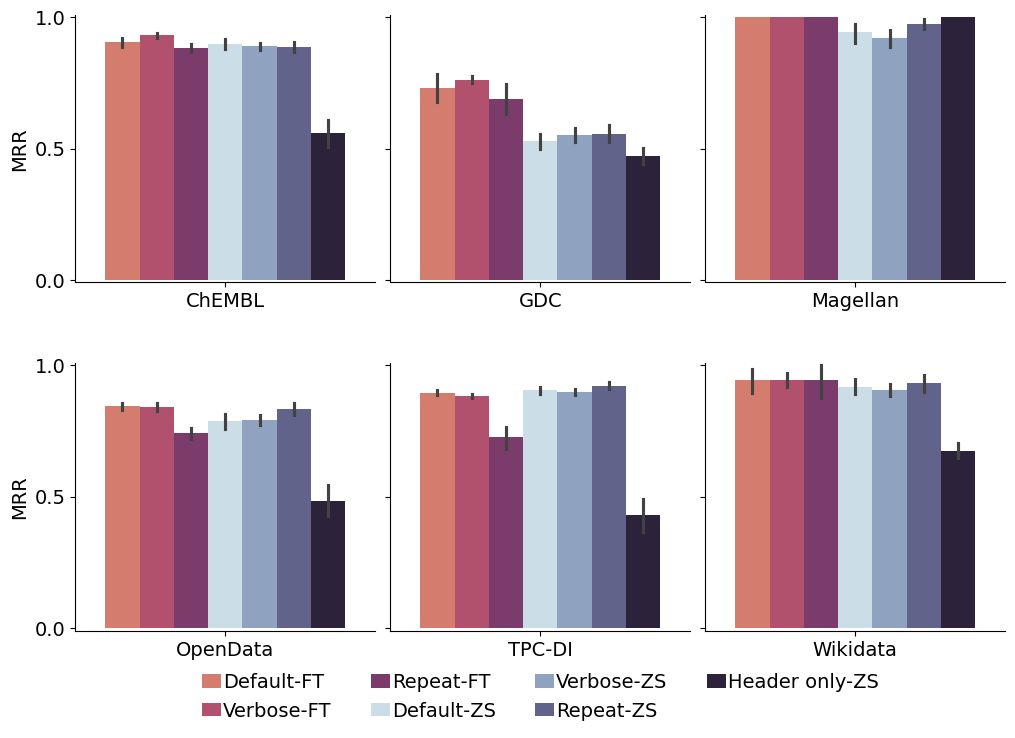

In [53]:
plot_bars_all_serialization(all_dfs)

In [ ]:
# take rows of datasets that are not GDC
all_dfs_no_gdc = all_dfs[all_dfs["dataset"] != "GDC"]
all_dfs_no_gdc["sampling_mode"] = all_dfs_no_gdc["sampling_mode"].replace(
    "Consistent", "Coordinated"
)

all_dfs_no_gdc = all_dfs_no_gdc[
    ~all_dfs_no_gdc["method"].str.contains("FT", case=False)
]

/var/folders/fg/7nky4sq13qzdxl2mf7k7znrm0000gn/T/ipykernel_96246/1623621746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_dfs_no_gdc['sampling_mode'] = all_dfs_no_gdc['sampling_mode'].replace('Consistent', 'Coordinated')


In [ ]:
def plot_serialization_sampling_mode(df, ylabel=None):
    methods = ["Priority", "Weighted", "Frequent", "Coordinated", "Random"]
    palette_colors = sns.color_palette("mako", n_colors=5)
    palette = dict(zip(methods, palette_colors))

    # Aggregating MRR over all datasets (assuming 'df' hasn't been aggregated yet)
    df_aggregated = (
        df.groupby(["sampling_mode", "method"]).agg({"MRR": "mean"}).reset_index()
    )
    # rank by MRR
    df_aggregated = df_aggregated.sort_values(by="MRR", ascending=False)
    # sort by MRR
    print(df_aggregated)
    # exit()

    # Create the plot
    plt.figure(figsize=(8, 6))
    ax = plt.gca()  # Get current axis

    sns.barplot(
        x="sampling_mode",
        y="MRR",
        order=methods,
        data=df,
        palette=palette,
        # dodge=True,  # No need to dodge since there's only one bar per x-tick
        ax=ax,
        width=0.8,
    )

    # make x label rotate
    plt.xticks(rotation=45)

    # remove top and right borders
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # round the numbers to 2 decimal places and put them on top of the bars
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.2f}",
            (p.get_x() + p.get_width() / 2.0, p.get_height() + 0.02),
            ha="center",
            va="center",
            fontsize=14,
            color="black",
            xytext=(0, 5),
            textcoords="offset points",
        )

    ax.set_xlabel("")
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=14)

    ax.tick_params(axis="both", which="major", labelsize=14)
    ax.set_ylim(-0.01, 1.01)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_yticklabels(["0.0", "0.5", "1.0"])

    plt.savefig("sampling_ablations", dpi=300)
    plt.show()

   sampling_mode          method       MRR
10      Priority       Repeat-ZS  0.903678
2    Coordinated       Repeat-ZS  0.897377
18      Weighted       Repeat-ZS  0.889985
14        Random       Repeat-ZS  0.887466
11      Priority      Verbose-ZS  0.887216
8       Priority      Default-ZS  0.886962
0    Coordinated      Default-ZS  0.879999
16      Weighted      Default-ZS  0.876054
19      Weighted      Verbose-ZS  0.869973
6       Frequent       Repeat-ZS  0.864745
12        Random      Default-ZS  0.863446
3    Coordinated      Verbose-ZS  0.862672
7       Frequent      Verbose-ZS  0.853307
15        Random      Verbose-ZS  0.853104
4       Frequent      Default-ZS  0.845645
9       Priority  Header only-ZS  0.529292
1    Coordinated  Header only-ZS  0.529292
5       Frequent  Header only-ZS  0.529292
13        Random  Header only-ZS  0.529292
17      Weighted  Header only-ZS  0.529292


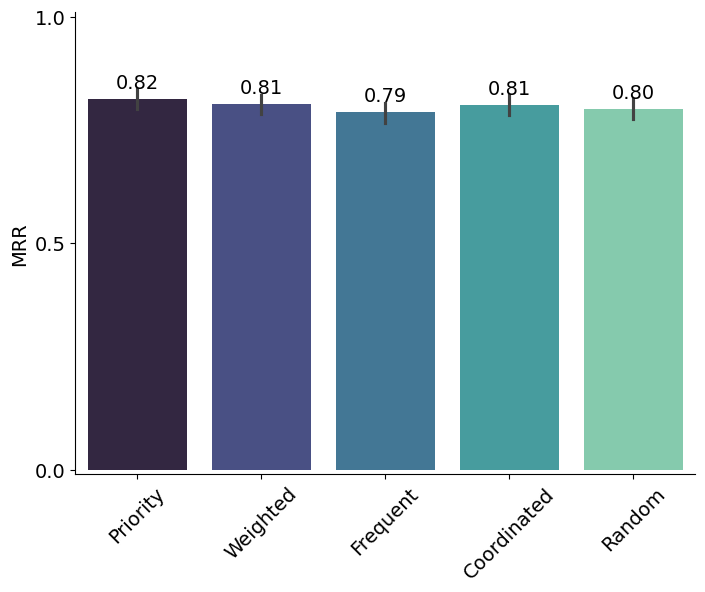

In [ ]:
plot_serialization_sampling_mode(all_dfs_no_gdc, ylabel="MRR")

In [ ]:
# read all_dfs
data = pd.read_csv("all_dfs.csv")

In [ ]:
filtered_data = data[
    (data["method"].str.contains("Repeat-ZS|Verbose-FT"))
    & (
        data["dataset"].isin(
            ["GDC", "ChEMBL", "Magellan", "OpenData", "TPC-DI", "Wikidata"]
        )
    )
]

# Create a pivot table for each metric (Recall@GT and MRR), then calculate mean and standard deviation
pivot_recall_mean = filtered_data.pivot_table(
    index=["method", "sampling_mode"],
    columns="dataset",
    values="Recall@GT",
    aggfunc="mean",
)
pivot_recall_std = filtered_data.pivot_table(
    index=["method", "sampling_mode"],
    columns="dataset",
    values="Recall@GT",
    aggfunc="std",
)

pivot_mrr_mean = filtered_data.pivot_table(
    index=["method", "sampling_mode"], columns="dataset", values="MRR", aggfunc="mean"
)
pivot_mrr_std = filtered_data.pivot_table(
    index=["method", "sampling_mode"], columns="dataset", values="MRR", aggfunc="std"
)

# Combining mean and std in the format mean (std)
pivot_combined = (
    pivot_recall_mean.astype(str)
    + " ("
    + pivot_recall_std.astype(str)
    + "), "
    + pivot_mrr_mean.astype(str)
    + " ("
    + pivot_mrr_std.astype(str)
    + ")"
)
pivot_combined.reset_index()

dataset,method,sampling_mode,ChEMBL,GDC,Magellan,OpenData,TPC-DI,Wikidata
0,Repeat-ZS,Consistent,"0.6014008370146477 (0.2602504193214275), 0.901...","0.33624453386370223 (0.06909806504332011), 0.5...","0.9351473922902495 (0.08496353844480212), 0.97...","0.5059021255561048 (0.29148053008324915), 0.83...","0.675206611570248 (0.2236009643719195), 0.9373...","0.79375 (0.0901066754628255), 0.93958333333333..."
1,Repeat-ZS,Frequent,"0.5246357436255135 (0.29585160891640194), 0.85...","0.33169907931824766 (0.06153206780381802), 0.5...","0.8547619047619047 (0.1541747102148769), 0.941...","0.5260240566814961 (0.29973013149912625), 0.83...","0.692378328741965 (0.19559414971499675), 0.885...","0.79375 (0.0901066754628255), 0.93958333333333..."
2,Repeat-ZS,Priority,"0.6201658529024258 (0.26353934025480014), 0.90...","0.34419907931824767 (0.08094132887767877), 0.5...","0.9351473922902495 (0.08496353844480212), 0.96...","0.5429296424452135 (0.29415261121901276), 0.84...","0.7258953168044077 (0.17364537185946263), 0.94...","0.78125 (0.09238982427534775), 0.9395833333333..."
3,Repeat-ZS,Random,"0.5718195380919165 (0.2677305133649569), 0.885...","0.33345617870972843 (0.07540830921305601), 0.5...","0.926984126984127 (0.09576573415237051), 1.0 (...","0.489187675070028 (0.28157581044699426), 0.830...","0.6646464646464647 (0.1974101524464994), 0.918...","0.71875 (0.09238982427534775), 0.9395833333333..."
4,Repeat-ZS,Weighted,"0.6030695380919165 (0.2664598801445044), 0.888...","0.34175163325518293 (0.06963484847844727), 0.5...","0.9280045351473923 (0.09913829865584266), 1.0 ...","0.4967638820233976 (0.29110962730377926), 0.82...","0.643067033976125 (0.2096429328800861), 0.9300...","0.63125 (0.17721808598447283), 0.9104166666666..."
5,Verbose-FT,Priority,"0.7741216512955644 (0.27274790639082935), 0.93...","0.43831993579560896 (0.08086385467776473), 0.7...","1.0 (0.0), 1.0 (0.0)","0.7429766990595121 (0.25492840560924535), 0.84...","0.7629648760330578 (0.25395153840964796), 0.88...","0.8312499999999999 (0.10604466518638622), 0.94..."


In [ ]:
all_ft_dfs_list = []
# for each folder in results_ft
for folder in os.listdir("./results_ft/"):
    if folder == ".DS_Store":
        continue
    datasetname = folder
    # if datasetname not in datasetnames:
    #     print(f'{datasetname} not in datasetnames')
    # continue
    for file in os.listdir(f"./results_ft/{folder}"):
        if "exact_semantic" in file:
            train_mode = "exact_semantic"
        elif "exact" in file:
            train_mode = "exact"
        elif "semantic" in file:
            train_mode = "semantic"
        print(file)
        df = pd.read_csv(f"./results_ft/{folder}/{file}")
        encoding_mode = None
        if "repeat" in file:
            encoding_mode = "header_values_repeat"
        elif "verbose" in file:
            encoding_mode = "header_values_verbose"
        elif "default" in file:
            encoding_mode = "header_values_default"
        df["train_mode"] = train_mode
        df["dataset"] = datasetname
        df["encoding_mode"] = encoding_mode
        df.rename(columns={"All_RecallAtSizeofGroundTruth": "Recall@GT"}, inplace=True)
        df.rename(columns={"mrr": "MRR"}, inplace=True)

        all_ft_dfs_list.append(df)

gdc_studiesheader_values_default-exact_semantic_results_.csv
gdc_studiesheader_values_repeat-exact_semantic_results_.csv
gdc_studiesheader_values_verbose-exact_results_.csv
gdc_studiesheader_values_verbose-exact_semantic_results_.csv
gdc_studiesheader_values_verbose-semantic_results_.csv
gdc_studiesheader_values_default-semantic_results_.csv
gdc_studiesheader_values_repeat-semantic_results_.csv
gdc_studiesheader_values_repeat-exact_results_.csv
gdc_studiesheader_values_default-exact_results_.csv
Magellan-magellan-header_values_verbose-exact_results.csv
Magellan-magellan-header_values_default-semantic_results.csv
Magellan-magellan-header_values_repeat-semantic_results.csv
Magellan-magellan-header_values_verbose-semantic_results.csv
Magellan-magellan-header_values_repeat-exact_semantic_results.csv
Magellan-magellan-header_values_verbose-exact_semantic_results.csv
Magellan-magellan-header_values_default-exact_semantic_results.csv
Magellan-magellan-header_values_default-exact_results.csv
M

In [ ]:
all_ft_dfs = pd.concat(all_ft_dfs_list)
all_ft_dfs = all_ft_dfs[all_ft_dfs["encoding_mode"] == "header_values_verbose"]
all_ft_dfs = all_ft_dfs[["dataset", "method", "train_mode", "Recall@GT", "MRR"]].copy()
all_ft_dfs

,dataset,method,train_mode,Recall@GT,MRR
0,GDC,MatchMakerFT,exact,0.400000,0.623840
1,GDC,MatchMakerFTGPT,exact,0.560000,0.714286
2,GDC,MatchMakerFT,exact,0.409091,0.800926
3,GDC,MatchMakerFTGPT,exact,0.363636,0.916667
4,GDC,MatchMakerFT,exact,0.629630,0.880238
...,...,...,...,...,...
355,ChEMBL,MatchMakerFTGPT,exact,1.000000,1.000000
356,ChEMBL,MatchMakerFT,exact,0.687500,0.764162
357,ChEMBL,MatchMakerFTGPT,exact,0.812500,0.937500
358,ChEMBL,MatchMakerFT,exact,1.000000,1.000000


In [ ]:
# save all_ft_dfs
all_ft_dfs.to_csv("all_ft_dfs.csv", index=False)

In [ ]:
# Filter the data to the necessary methods and calculate mean and standard deviation for Recall@GT and MRR.
# Also, I will assume that the train_mode indicates the generation method categories.

# Filter relevant datasets only
relevant_datasets = ["GDC", "ChEMBL", "Magellan", "OpenData", "TPC-DI", "Wikidata"]
filtered_new_data = all_ft_dfs[all_ft_dfs["dataset"].isin(relevant_datasets)]

# Pivot table to calculate mean and standard deviation for Recall@GT and MRR
pivot_recall_mean = filtered_new_data.pivot_table(
    index=["method", "train_mode"],
    columns="dataset",
    values="Recall@GT",
    aggfunc="mean",
)
pivot_recall_std = filtered_new_data.pivot_table(
    index=["method", "train_mode"], columns="dataset", values="Recall@GT", aggfunc="std"
)

pivot_mrr_mean = filtered_new_data.pivot_table(
    index=["method", "train_mode"], columns="dataset", values="MRR", aggfunc="mean"
)
pivot_mrr_std = filtered_new_data.pivot_table(
    index=["method", "train_mode"], columns="dataset", values="MRR", aggfunc="std"
)


# Combine the means and standard deviations into a single string format
def combine_mean_std(mean, std):
    return mean.round(3).astype(str) + "±" + std.round(2).astype(str)


# Applying the function to each pivot
combined_recall = combine_mean_std(pivot_recall_mean, pivot_recall_std)
combined_mrr = combine_mean_std(pivot_mrr_mean, pivot_mrr_std)

# Show combined data for Recall@GT
combined_recall.fillna("N/A"), combined_mrr.fillna("N/A")

(dataset                             ChEMBL         GDC Magellan    OpenData  \
 method          train_mode                                                    
 MatchMakerFT    exact           0.764±0.28  0.428±0.09  1.0±0.0  0.711±0.27   
                 exact_semantic  0.774±0.27  0.438±0.08  1.0±0.0  0.743±0.26   
                 semantic        0.785±0.26  0.414±0.11  1.0±0.0  0.729±0.27   
 MatchMakerFTGPT exact           0.839±0.23  0.481±0.12  1.0±0.0   0.522±0.3   
                 exact_semantic  0.835±0.23  0.479±0.15  1.0±0.0   0.527±0.3   
                 semantic        0.844±0.23  0.496±0.14  1.0±0.0   0.486±0.3   
 
 dataset                             TPC-DI    Wikidata  
 method          train_mode                              
 MatchMakerFT    exact           0.773±0.26  0.831±0.12  
                 exact_semantic  0.763±0.25  0.831±0.12  
                 semantic          0.74±0.3  0.831±0.12  
 MatchMakerFTGPT exact            0.83±0.23  0.871±0.11  
          